In [1]:
#This is a visualization of manchester united's 2018-19 season

# Things to be Analysed
# 1. Performance @ Home And Away
# 2. Performance Against Big Six
# 3. Goals Scored & Goals Conceded
# 4. Goals Scored & Conceded Against Big Six
# 5. First Half & Second Half Performance
# 6. Shots on target and Goal Conversion Rate

In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

from __future__ import division

In [3]:
Season_18_19 = pd.read_csv('E:\Data Analytics\MyAnalytics\ManUtd\epl_18_19.csv')

In [4]:
Season_18_19.head()

,Date,HomeTeam,AwayTeam,Full Time Home Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,Home Team Shots,...,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,10-08-2018,Man United,Leicester,2,1,H,1,0,H,8,...,6,4,11,8,2,5,2,1,0,0
1,11-08-2018,Bournemouth,Cardiff,2,0,H,1,0,H,12,...,4,1,11,9,7,4,1,1,0,0
2,11-08-2018,Fulham,Crystal Palace,0,2,A,0,1,A,15,...,6,9,9,11,5,5,1,2,0,0
3,11-08-2018,Huddersfield,Chelsea,0,3,A,0,2,A,6,...,1,4,9,8,2,5,2,1,0,0
4,11-08-2018,Newcastle,Tottenham,1,2,A,1,2,A,15,...,2,5,11,12,3,5,2,2,0,0


In [5]:
teams = Season_18_19['HomeTeam'].unique().tolist()
teams = sorted(teams)
print(teams)
print(len(teams))

['Arsenal', 'Bournemouth', 'Brighton', 'Burnley', 'Cardiff', 'Chelsea', 'Crystal Palace', 'Everton', 'Fulham', 'Huddersfield', 'Leicester', 'Liverpool', 'Man City', 'Man United', 'Newcastle', 'Southampton', 'Tottenham', 'Watford', 'West Ham', 'Wolves']
20


In [6]:
pointsTable = {}

for team in teams:
    total_scored = 0
    total_conceded = 0
    
    total_wins = ((Season_18_19.HomeTeam == team) & (Season_18_19['Full Time Result'] == 'H')).sum()
    
    total_wins += ((Season_18_19.AwayTeam == team) & (Season_18_19['Full Time Result'] == 'A')).sum()
    
    total_loss = ((Season_18_19.HomeTeam == team) & (Season_18_19['Full Time Result'] == 'A')).sum()
    
    total_loss += ((Season_18_19.AwayTeam == team) & (Season_18_19['Full Time Result'] == 'H')).sum()
    
    total_draws = (((Season_18_19.HomeTeam == team) | (Season_18_19.AwayTeam == team)) & 
                   (Season_18_19['Full Time Result'] == 'D')).sum()
    
    total_points = (total_wins * 3) + (total_draws)
    
    for index,row in Season_18_19.iterrows():
        if(row['HomeTeam'] == team):
            total_scored += row['Full Time Home Goals']
            total_conceded += row['Full Time Away Team Goals']        
        elif(row['AwayTeam'] == team):
            total_scored += row['Full Time Away Team Goals']
            total_conceded += row['Full Time Home Goals']
    
    goal_difference = total_scored - total_conceded
           
    total_Matches = total_wins + total_loss + total_draws
    
    pointsTable[team] = [total_Matches,total_wins,total_loss,total_draws,total_points,goal_difference]
    
Points_Table = pd.DataFrame.from_dict(pointsTable, orient='index').reset_index()

Points_Table.columns = ['Team','Matches','Wins','Loss','Draws','Points','GD']

Points_Table = Points_Table.sort_values(by=['Points'],ascending = False)

Points_Table.head()

,Team,Matches,Wins,Loss,Draws,Points,GD
3,Man City,38,32,4,2,98,72
1,Liverpool,38,30,1,7,97,67
17,Chelsea,38,21,8,9,72,24
18,Tottenham,38,23,13,2,71,28
6,Arsenal,38,21,10,7,70,22


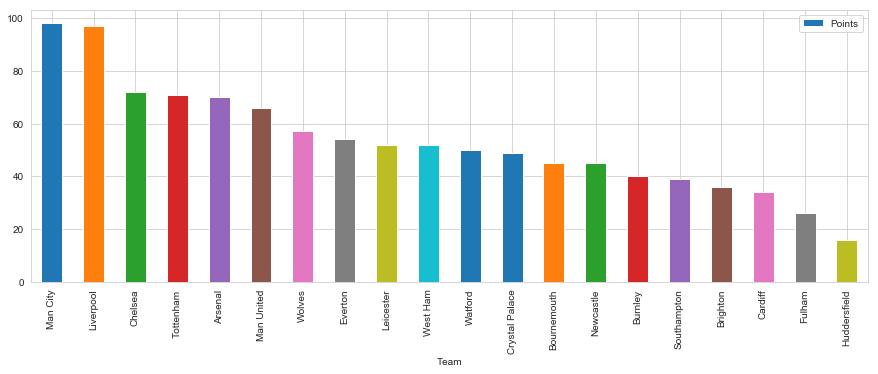

In [19]:
Points_Table.plot.bar(x = 'Team',y = 'Points',figsize = (15,5))

In [7]:
ManchesterUnited_DF = Season_18_19[(Season_18_19['HomeTeam'] == 'Man United') | (Season_18_19['AwayTeam'] == 'Man United')]
ManchesterUnited_DF.head()

,Date,HomeTeam,AwayTeam,Full Time Home Goals,Full Time Away Team Goals,Full Time Result,Half Time Home Team Goals,Half Time Away Team Goals,Half Time Result,Home Team Shots,...,Home Team Shots on Target,Away Team Shots on Target,Home Team Fouls Committed,Away Team Fouls Committed,Home Team Corners,Away Team Corners,Home Team Yellow Cards,Away Team Yellow Cards,Home Team Red Cards,Away Team Red Cards
0,10-08-2018,Man United,Leicester,2,1,H,1,0,H,8,...,6,4,11,8,2,5,2,1,0,0
16,19-08-2018,Brighton,Man United,3,2,H,3,1,H,6,...,3,3,16,13,3,5,1,1,0,0
29,27-08-2018,Man United,Tottenham,0,3,A,0,0,D,23,...,5,5,11,16,5,2,2,4,0,0
37,02-09-2018,Burnley,Man United,0,2,A,0,2,A,9,...,2,9,7,13,2,5,2,3,0,1
46,15-09-2018,Watford,Man United,1,2,A,0,2,A,14,...,5,6,9,11,6,8,2,1,0,1


In [8]:
# Calculating The number of wins,draws,loss @Home
Home_Wins = 0
Home_Draws = 0
Home_Loss = 0
for index,row in ManchesterUnited_DF.iterrows():
    if(row['HomeTeam'] == 'Man United' and row['Full Time Result'] == 'H'):
        Home_Wins += 1
    elif(row['HomeTeam'] == 'Man United' and row['Full Time Result'] == 'D'):
        Home_Draws += 1
    elif(row['HomeTeam'] == 'Man United' and row['Full Time Result'] == 'A'):
        print(row['AwayTeam'])    
        Home_Loss += 1
print(Home_Wins)
print(Home_Draws)
print(Home_Loss)

Tottenham
Man City
Cardiff
10
6
3


In [9]:
Away_Wins = 0
Away_Draws = 0
Away_Loss = 0
for index,row in ManchesterUnited_DF.iterrows():
    if(row['AwayTeam'] == 'Man United' and row['Full Time Result'] == 'A'):
        Away_Wins += 1
    elif(row['AwayTeam'] == 'Man United' and row['Full Time Result'] == 'D'):
        Away_Draws += 1
    elif(row['AwayTeam'] == 'Man United' and row['Full Time Result'] == 'H'):
        print(row['HomeTeam'])    
        Away_Loss += 1
print(Away_Wins)
print(Away_Draws)
print(Away_Loss)

Brighton
West Ham
Man City
Liverpool
Arsenal
Wolves
Everton
9
3
7


In [10]:
Home_Wins = ManchesterUnited_DF[(ManchesterUnited_DF['HomeTeam'] == 'Man United') & 
                              (ManchesterUnited_DF['Full Time Result'] == 'H')].count()

Home_Draws = ManchesterUnited_DF[(ManchesterUnited_DF['HomeTeam'] == 'Man United') & 
                              (ManchesterUnited_DF['Full Time Result'] == 'D')].count()

Home_Loss = ManchesterUnited_DF[(ManchesterUnited_DF['HomeTeam'] == 'Man United') & 
                              (ManchesterUnited_DF['Full Time Result'] == 'A')].count()

Away_Wins = ManchesterUnited_DF[(ManchesterUnited_DF['AwayTeam'] == 'Man United') & 
                              (ManchesterUnited_DF['Full Time Result'] == 'A')].count()

Away_Draws = ManchesterUnited_DF[(ManchesterUnited_DF['AwayTeam'] == 'Man United') & 
                              (ManchesterUnited_DF['Full Time Result'] == 'D')].count()

Away_Loss = ManchesterUnited_DF[(ManchesterUnited_DF['AwayTeam'] == 'Man United') & 
                              (ManchesterUnited_DF['Full Time Result'] == 'H')].count()
Total_Matches = ManchesterUnited_DF.count()

In [11]:
Total_Wins = Home_Wins['Full Time Result'] + Away_Wins['Full Time Result']
Total_Draws = Home_Draws['Full Time Result'] + Away_Draws['Full Time Result']
Total_Loss = Home_Loss['Full Time Result'] + Away_Loss['Full Time Result']
Total_Matches = Total_Matches['Full Time Result']
print('Total Wins: %d' %Total_Wins)
print('Total Draws: %d' %Total_Draws)
print('Total Loss: %d' %Total_Loss)
print(Total_Matches)

Total Wins: 19
Total Draws: 9
Total Loss: 10
38


In [12]:
Total_Points = Total_Wins*3+Total_Draws
Average_Points_Per_Game = Total_Points/Total_Matches
print('Total Points: %d' %Total_Points)
print('Total Points: %f' %Average_Points_Per_Game)

Total Points: 66
Total Points: 1.736842
